In [1]:
import torch
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"]=r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_experiments(data, labels, title, best_value, ylim=None):
    num_iterations = 100
    t = torch.linspace(0, num_iterations, num_iterations + 1)

    b = 2
    for i, algo in enumerate(labels):
        label = labels[algo][0]
        color = labels[algo][1]

        utility = torch.log(best_value - data["all_set_utilities"][algo])
        mean_utility = utility.mean(dim=0)
        std_utility = utility.std(dim=0)
        plt.plot(t, mean_utility, label=label, linewidth=4, color=color)
        plt.fill_between(
            t, 
            mean_utility+b*std_utility, 
            mean_utility-b*std_utility, 
            alpha=0.15, color=color, edgecolor="w", linewidth=3
        )
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(0, num_iterations)
    plt.xticks(np.linspace(0, 100, 6), fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title, fontsize=30)
    plt.grid(alpha=0.5)
    return None

In [3]:
algo =  {
    "sobol": ["Sobol", "black"],
    "r2": [r"R2", "orange"], 
    "hv": [r"Hypervolume", "dodgerblue"], 
    "igd": [r"IGD+", "crimson"], 
    "d1": ["D1", "mediumseagreen"], 
}

In [4]:
d1_data = []
igd_data = []
r2_data = []
hv_data = []

for dim in range(4, 9):
    d1_data += [torch.load(f"data/dtlz2/dim{dim}_d1.pt")]
    igd_data += [torch.load(f"data/dtlz2/dim{dim}_igd.pt")] 
    r2_data += [torch.load(f"data/dtlz2/dim{dim}_r2.pt")] 
    hv_data += [torch.load(f"data/dtlz2/dim{dim}_hv.pt")] 

titles = [r"$D$=$4$", r"$D$=$5$", r"$D$=$6$", r"$D$=$7$", r"$D$=$8$"]

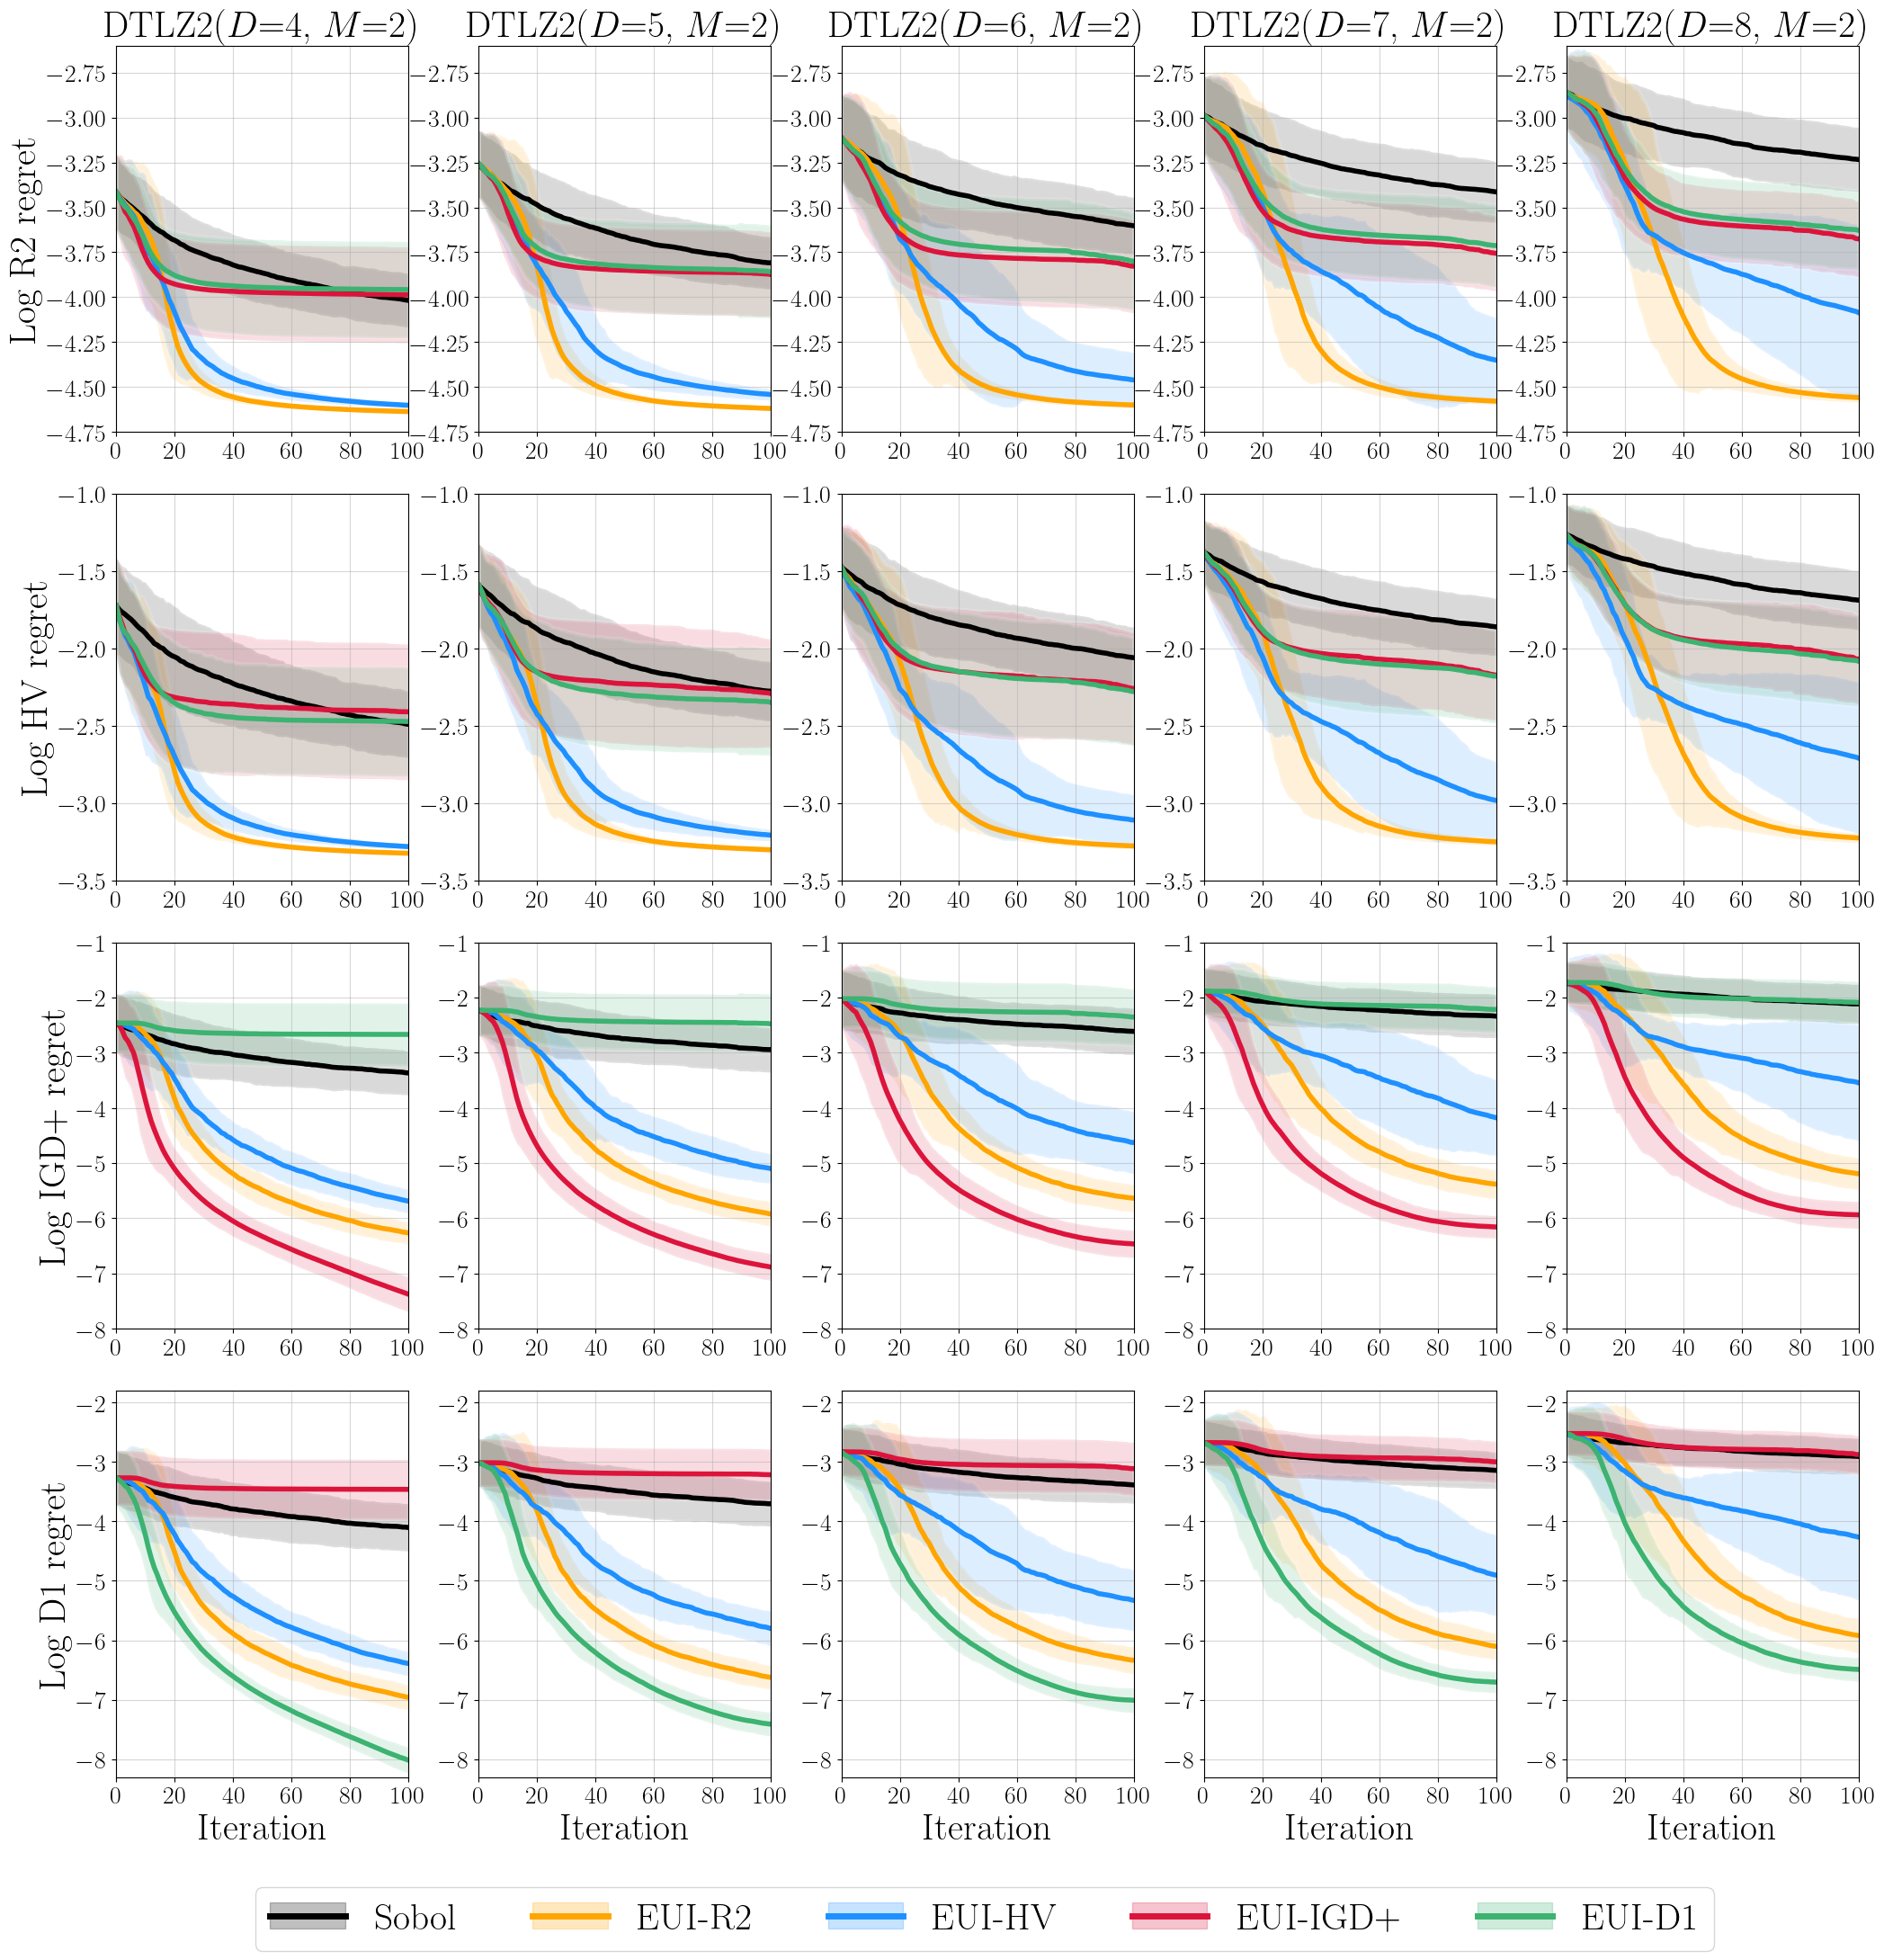

In [5]:
fig, axes = plt.subplots(4, 5, figsize=(25, 25))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.24, hspace=0.16)
#################################################
for i in range(len(r2_data)):
    plt.subplot(4, 5, 1+i)
    plot_experiments(
        data=r2_data[i], 
        labels=algo, 
        title="DTLZ2(" + titles[i] + r", $M$=2)",  
        best_value=0.2,
        ylim=[-4.75, -2.6],
    )
    if i == 0:
        plt.ylabel("Log R2 regret", fontsize=30)
#################################################
for i in range(len(hv_data)):
    plt.subplot(4, 5, 6+i)
    plot_experiments(
        data=hv_data[i], 
        labels=algo, 
        title="",  
        best_value=1.05,
        ylim=[-3.5, -1],
    )
    if i == 0:
        plt.ylabel("Log HV regret", fontsize=30)
#################################################
for i in range(len(igd_data)):
    plt.subplot(4, 5, 11+i)
    plot_experiments(
        data=igd_data[i], 
        labels=algo, 
        title="", 
        best_value=0,
        ylim=[-8, -1],
    )
    if i == 0:
        plt.ylabel("Log IGD+ regret", fontsize=30)
#################################################
for i in range(len(d1_data)):
    plt.subplot(4, 5, 16+i)
    plot_experiments(
        data=d1_data[i], 
        labels=algo, 
        title="", 
        best_value=0,
        ylim=[-8.3, -1.8],
    )
    if i == 0:
        plt.ylabel("Log D1 regret", fontsize=30)
        
    plt.xlabel("Iteration", fontsize=30)
#################################################
black_line = mlines.Line2D([], [], color="black", linestyle="-", linewidth=5)
black_patch = mpatches.Patch(color="black", alpha=0.25)

blue_line = mlines.Line2D([], [], color="dodgerblue", linestyle="-", linewidth=5)
blue_patch = mpatches.Patch(color="dodgerblue", alpha=0.25)

green_line = mlines.Line2D([], [], color="mediumseagreen", linestyle="-", linewidth=5)
green_patch = mpatches.Patch(color="mediumseagreen", alpha=0.25)

red_line = mlines.Line2D([], [], color="crimson", linestyle="-", linewidth=5)
red_patch = mpatches.Patch(color="crimson", alpha=0.25)

orange_line = mlines.Line2D([], [], color="orange", linestyle="-", linewidth=5)
orange_patch = mpatches.Patch(color="orange", alpha=0.25)

labels = ["Sobol", "EUI-R2", "EUI-HV", "EUI-IGD+", "EUI-D1"]

axes[3, 0].legend(
    handles=[
        (black_line, black_patch), 
        (orange_line, orange_patch),
        (blue_line, blue_patch), 
        (red_line, red_patch),
        (green_line, green_patch), 
    ], labels=labels, 
    loc=(0.475, -0.45), ncol=5, fontsize=30
)
plt.show()